In [22]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.graphics import tsaplots
import statsmodels.api as sm
from pylab import rcParams

In [47]:
# import data
co2_levels = pd.read_csv('../data/ch2_co2_levels.csv')
co2_levels['datestamp'] = pd.to_datetime(co2_levels['datestamp'])
# Set datestamp column as index
co2_levels = co2_levels.set_index('datestamp')
co2_levels = co2_levels.bfill()


## Autocorrelation and Partial autocorrelation

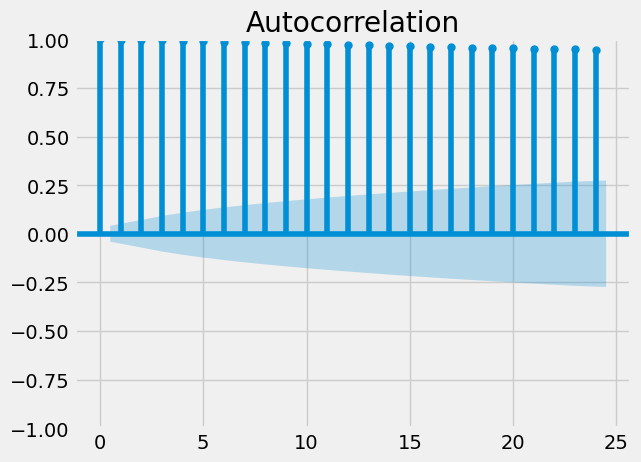

In [15]:
# Use the plot_acf() function from tsaplots to plot the autocorrelation of the 'co2' column in co2_levels. Specify a maximum lag of 24.
fig = tsaplots.plot_acf(co2_levels['co2'], lags=24)
plt.show()


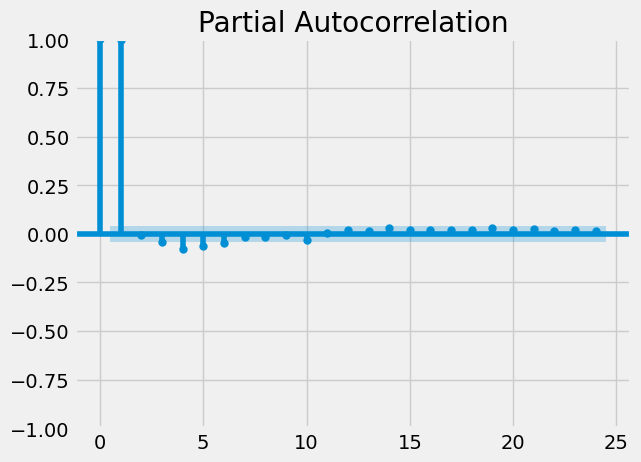

In [16]:
# # Display the partial autocorrelation plot of your time series
fig = tsaplots.plot_pacf(co2_levels['co2'], lags=24)

# Show plot
plt.show()

## Seasonality, trend and noise in time series data

When visualizing time series data, you should look out for some distinguishable patterns:

### seasonality: does the data display a clear periodic pattern?
### trend: does the data follow a consistent upwards or downward slope?
### noise: are there any outlier points or missing values that are not consistent with the rest of the data?

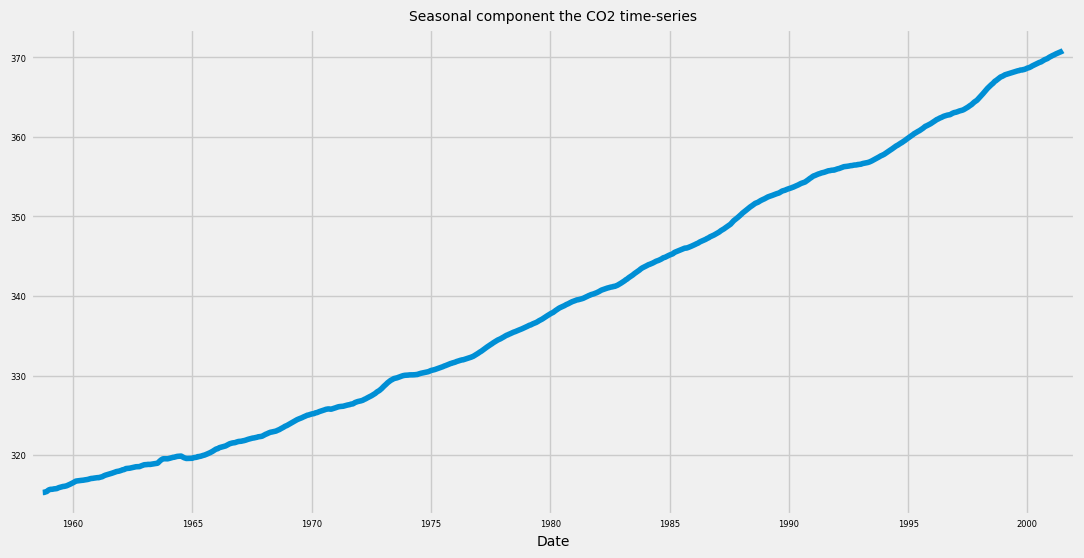

In [27]:
# Perform time series decomposition on the co2_levels DataFrame into a variable called decomposition
# Perform time series decompositon
rcParams['figure.figsize'] = 11, 9
decomposition = sm.tsa.seasonal_decompose(co2_levels)

# Print the seasonality component
#print(decomposition.seasonal)
# draw the deom plot
#fig = decomposition.plot()
#plt.show()


#  extract the observed, trend and noise (or residual, resid)
observed = decomposition.observed
trend = decomposition.trend
residuals = decomposition.resid

# Plot the values of the trend
ax = trend.plot(figsize=(12, 6), fontsize=6)

# Specify axis labels
ax.set_xlabel('Date', fontsize=10)
ax.set_title('Seasonal component the CO2 time-series', fontsize=10)
plt.show()

## Analysis with aitline data

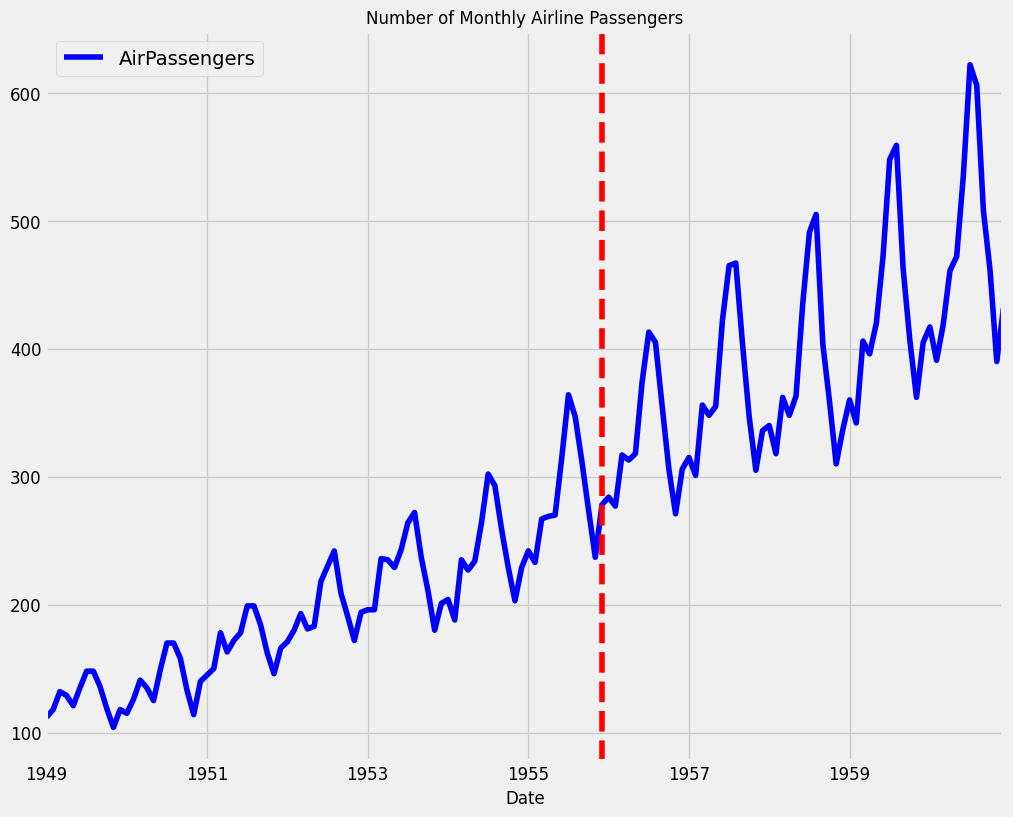

AirPassengers    0
dtype: int64
       AirPassengers
count     144.000000
mean      280.298611
std       119.966317
min       104.000000
25%       180.000000
50%       265.500000
75%       360.500000
max       622.000000


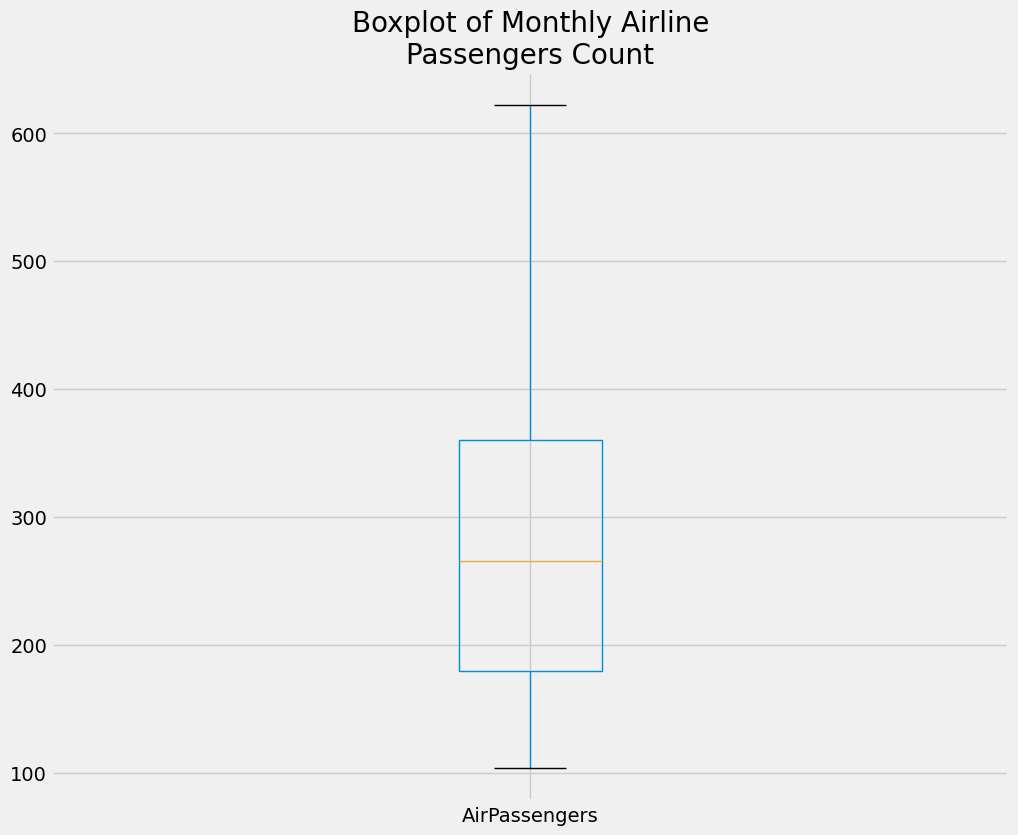

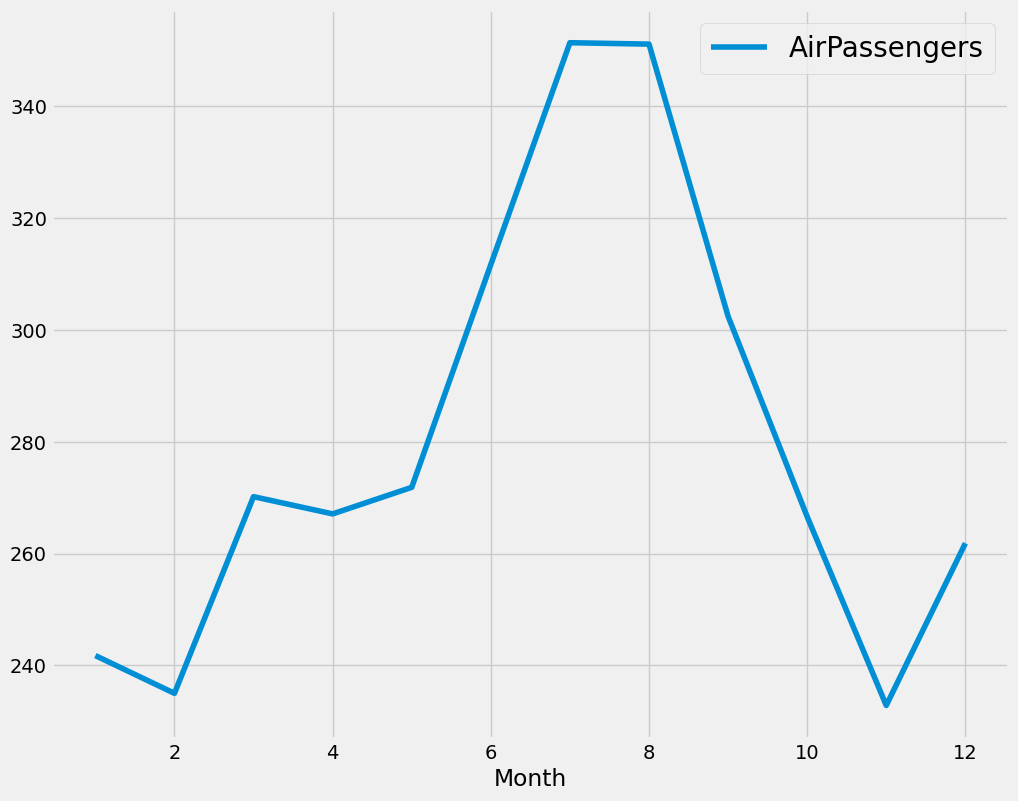

            trend   seasonal
Month                       
1949-01-01    NaN -24.748737
1949-02-01    NaN -36.188131
1949-03-01    NaN  -2.241162
1949-04-01    NaN  -8.036616
1949-05-01    NaN  -4.506313


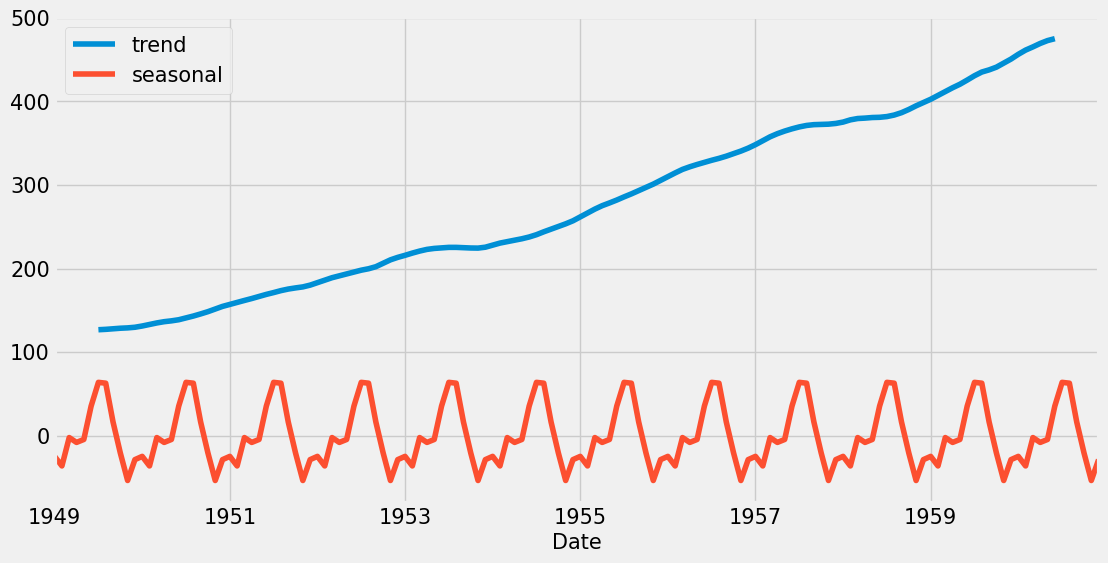

In [46]:
airline = pd.read_csv('../data/ch3_airline_passengers.csv')
airline['Month'] = pd.to_datetime(airline['Month'])
airline = airline.set_index('Month')

# Plot the time series in your DataFrame
ax = airline.plot(color='blue', fontsize=12)

# Add a red vertical line at the date 1955-12-01
ax.axvline('1955-12-01', color='red', linestyle='--')

# Specify the labels in your plot
ax.set_xlabel('Date', fontsize=12)
ax.set_title('Number of Monthly Airline Passengers', fontsize=12)
plt.show()

# Print out the number of missing values
print(airline.isnull().sum())

# Print out summary statistics of the airline DataFrame
print(airline.describe())

# Display boxplot of airline values
ax = airline.boxplot()

# Specify the title of your plot
ax.set_title('Boxplot of Monthly Airline\nPassengers Count', fontsize=20)
plt.show()

# Get month for each dates from the index of airline
index_month = airline.index.month

# Compute the mean number of passengers for each month of the year
mean_airline_by_month = airline.groupby(index_month).mean()

# Plot the mean number of passengers for each month of the year
mean_airline_by_month.plot()
plt.legend(fontsize=20)
plt.show()

# Perform time series decompositon
decomposition = sm.tsa.seasonal_decompose(airline)

# Extract the trend and seasonal components
trend = decomposition.trend
seasonal = decomposition.seasonal

# create tend dataframe
airline_decomposed = pd.concat({"trend": trend, "seasonal":seasonal},axis =1)

#airline_decomposed = trend.merge(seasonal, on='Month')
print(airline_decomposed.head())

# Plot the values of the airline_decomposed DataFrame
ax = airline_decomposed.plot(figsize=(12, 6), fontsize=15)

# Specify axis labels
ax.set_xlabel('Date', fontsize=15)
plt.legend(fontsize=15)
plt.show()